# Chapter 14 - Learning Curves

- Recall, a validation curve shows the tradeoff between evaluation error and number of hyperparameters
- In contrast, a learning curve, shows the tradeoff between *amount of data* and evaluation error
    - Note, the learning curve on the training data will actually be downward sloping! That's because you have an overfit model for small amounts of data
    - The learning curve on the OOS data in cross-validation should be upward sloping!
- The relationship between learning curves on training and cross-validation data tells a story:
    - if performance is quite similar, your model is likely *underfit*
    - if enormous gap in performance and the gap is not shrinking because of improved cross-validation scores (but rather falling training scores), your model is likely *overfit*

In [1]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:32: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df_.Q4.replace({'Master’s degree': 18,
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjEx

In [2]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing, ensemble
import xgboost as xgb
import dtreeviz
import yellowbrick.model_selection as ms
#also, must install graphviz for plotting to work with xgb

In [3]:
params = {'learning_rate': 0.3,
    'max_depth': 2,
    'n_estimators': 200,
    'n_jobs': -1, #number of jobs in parallel
    'random_state': 42,
    'reg_lambda': 0,
    'subsample': 1}

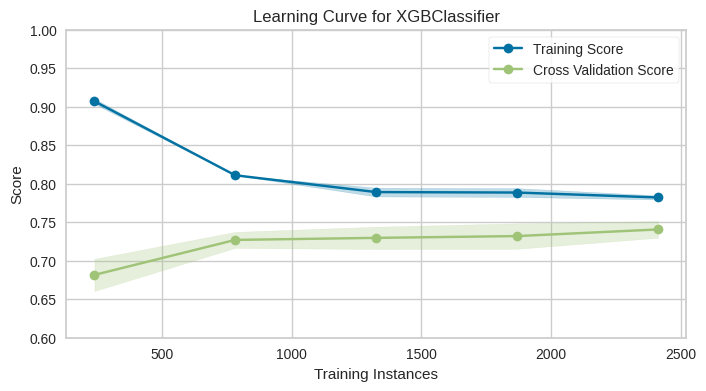

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim(0.6,1)
viz = ms.learning_curve(xgb.XGBClassifier(**params),X, y,ax=ax)


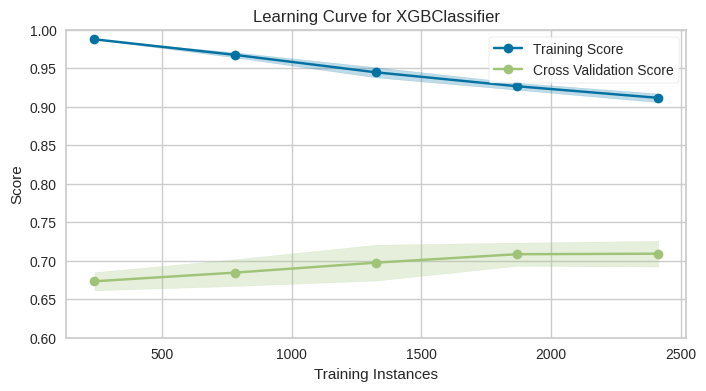

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim(0.6,1)
viz = ms.learning_curve(xgb.XGBClassifier(max_depth=7),X, y,ax=ax)

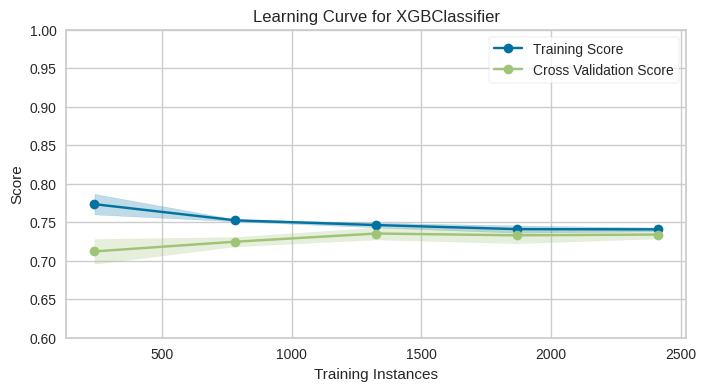

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim(0.6,1)
viz = ms.learning_curve(xgb.XGBClassifier(max_depth=1),X, y,ax=ax) #underfit. training score and cross validation score the same

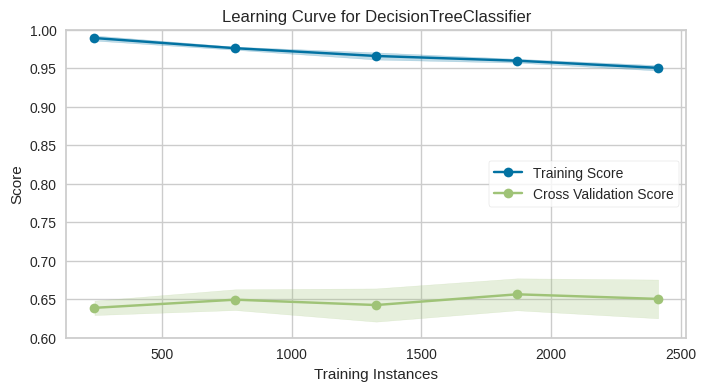

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim(0.6,1)
viz = ms.learning_curve(tree.DecisionTreeClassifier(),X, y,ax=ax) #Overfit.
# Huge gap between training and cross validation. training falling but cross validation not improving